# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# !pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get weather data
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=3))

{
   "coord": {
      "lon": 115.33,
      "lat": -33.65
   },
   "weather": [
      {
         "id": 803,
         "main": "Clouds",
         "description": "broken clouds",
         "icon": "04n"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 43.52,
      "feels_like": 35.96,
      "temp_min": 39.99,
      "temp_max": 46.99,
      "pressure": 1019,
      "humidity": 76
   },
   "visibility": 10000,
   "wind": {
      "speed": 8.34,
      "deg": 69
   },
   "clouds": {
      "all": 54
   },
   "dt": 1595195568,
   "sys": {
      "type": 3,
      "id": 2011706,
      "country": "AU",
      "sunrise": 1595200711,
      "sunset": 1595237470
   },
   "timezone": 28800,
   "id": 2075265,
   "name": "Busselton",
   "cod": 200
}


In [23]:
# Get weather data
names = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

count = 1
next_record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
    
        # append data into empty sets
        names.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
    
        # conditional for records and sets
        if count <= 50:
            print(f"Processing Record {count} of Set {next_record} | {city_record}")
            count += 1 
        
        else: 
            count = 0
            next_record += 1
            print(f"Processing Record {count} of Set {next_record} | {city_record}")
            count += 1
    except: 
        print("City not found. Skipping...")
        pass
        

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------") 

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Ngunguru
City not found. Skipping...
Processing Record 2 of Set 1 | São João da Barra
Processing Record 3 of Set 1 | The Valley
Processing Record 4 of Set 1 | Half Moon Bay
City not found. Skipping...
Processing Record 5 of Set 1 | Khatanga
Processing Record 6 of Set 1 | Nema
Processing Record 7 of Set 1 | Biak
Processing Record 8 of Set 1 | Naze
Processing Record 9 of Set 1 | Anori
Processing Record 10 of Set 1 | Erenhot
Processing Record 11 of Set 1 | ‘Āhuimanu
Processing Record 12 of Set 1 | Emerald
Processing Record 13 of Set 1 | Punta Arenas
Processing Record 14 of Set 1 | Tehachapi
Processing Record 15 of Set 1 | Albany
Processing Record 16 of Set 1 | Beringovskiy
Processing Record 17 of Set 1 | Port Alfred
Processing Record 18 of Set 1 | Hithadhoo
Processing Record 19 of Set 1 | Mahébourg
Processing Record 20 of Set 1 | Darnah
Processing Record 21 of Set 1 | Lebowakgomo
Processing Record 22 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Convert raw data into dictionary
weather_dict = {
    "City": names,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
# convert dict into df
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [31]:
weather_df.to_csv("weather_df", encoding="utf-8", index=False)

In [36]:
weather_df.head(100)

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0            Ngunguru -35.62  174.50     59.00         3          38   
1   São João da Barra -21.64  -41.05     71.60        78           0   
2          The Valley  18.22  -63.06     86.00        66          40   
3       Half Moon Bay  37.46 -122.43     75.00        77          90   
4            Khatanga  71.97  102.50     51.62        78          97   
..                ...    ...     ...       ...       ...         ...   
95            Beipiao  41.79  120.78     67.17        57         100   
96        East London -33.02   27.91     60.64        74           0   
97         Nikolskoye  59.70   30.79     64.40        72           3   
98      Puerto Madryn -42.77  -65.04     46.51        84         100   
99     Saint-Philippe -21.36   55.77     64.40        77          20   

    Wind Speed Country        Date  
0         1.99      NZ  1595197012  
1        11.41      BR  1595197013  
2        13.87      AI  1595196999  
3         6.93      US  1595196839  
4         4.14      RU  1595197013  
..         ...     ...         ...  
95        4.72      CN  1595197025  
96        9.44      ZA  1595197026  
97        2.24      RU  1595197026  
98       11.63      AR  1595197026  
99        9.17      RE  1595197026  

[100 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
heavy_humid = len(weather_df.loc[(weather_df["Humidity"] > 100)])
heavy_humid
# we can skip this step and move onto the plotting

0

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [7]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

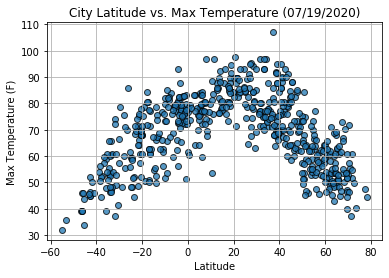

In [58]:
# making a scatter plot of lat vs max temp
plt.title("City Latitude vs. Max Temperature (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_MaxTemp.png")

## Latitude vs. Humidity Plot

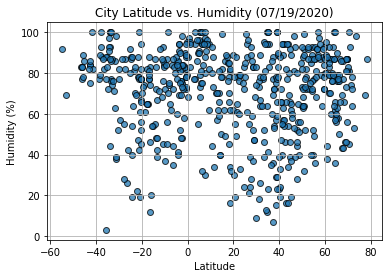

In [62]:
# making a scatter plot of lat vs humidity
plt.title("City Latitude vs. Humidity (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_Humidity.png")

## Latitude vs. Cloudiness Plot

In [64]:
# making a scatter plot of lat vs cloudiness
plt.title("City Latitude vs. Cloudiness (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

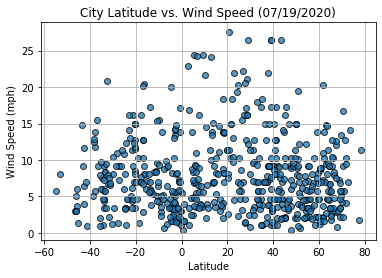

In [66]:
# making a scatter plot of lat vs cloudiness
plt.title("City Latitude vs. Wind Speed (07/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], alpha=.75, edgecolor="black");

plt.savefig("Lat_Vs_Wind.png")

## Linear Regression

In [8]:
# OPTIONAL: Create a function to create Linear Regression plots

In [9]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression